In [28]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing the dataset
df = pd.read_csv('Bestsellers with categories.csv')

In [5]:
# First 40 lines
df.head(40)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [6]:
# Last 40 lines
df.tail(40)

,Name,Author,User Rating,Reviews,Price,Year,Genre
510,"Tools of Titans: The Tactics, Routines, and Ha...",Timothy Ferriss,4.6,4360,21,2017,Non Fiction
511,"Towers of Midnight (Wheel of Time, Book Thirteen)",Robert Jordan,4.8,2282,21,2010,Fiction
512,True Compass: A Memoir,Edward M. Kennedy,4.5,438,15,2009,Non Fiction
513,"Twilight (The Twilight Saga, Book 1)",Stephenie Meyer,4.7,11676,9,2009,Fiction
514,Ultimate Sticker Book: Frozen: More Than 60 Re...,DK,4.5,2586,5,2014,Fiction
515,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2010,Non Fiction
516,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2011,Non Fiction
517,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2012,Non Fiction
518,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,13,2014,Non Fiction
519,"Unbroken: A World War II Story of Survival, Re...",Laura Hillenbrand,4.8,29673,16,2014,Non Fiction


In [7]:
# Checking for any null values
df.isnull().sum()

,0
Name,0
Author,0
User Rating,0
Reviews,0
Price,0
Year,0
Genre,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [13]:
# Finding the minimum of User Rating for binning
min_user_rat = df['User Rating'].min()
print("Minimum User Rating:", min_user_rat)

Minimum User Rating: 3.3


In [14]:
# Finding the maximum of User Rating for binning
max_user_rat = df['User Rating'].max()
print("Maximum User Rating:", max_user_rat)

Maximum User Rating: 4.9


In [17]:
# Now binning of User Rating
bins = [3, 4, 5]
df['binned_ur'] = pd.cut(df["User Rating"], bins)
print(df[['binned_ur', 'User Rating']].head())

  binned_ur  User Rating
0    (4, 5]          4.7
1    (4, 5]          4.6
2    (4, 5]          4.7
3    (4, 5]          4.7
4    (4, 5]          4.8


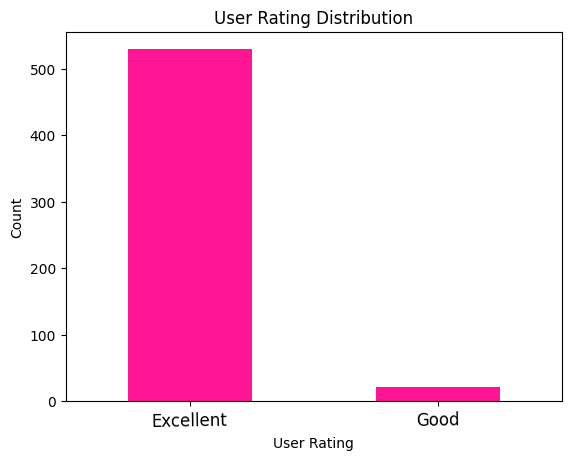

In [27]:
# Labels
ur_labels = ['Good', 'Excellent']

df['binned_ur'] = pd.cut(df["User Rating"], bins, labels=ur_labels)
df['binned_ur'].value_counts().plot(kind='bar', color='deeppink')
plt.title("User Rating Distribution")
plt.xlabel("User Rating")
plt.ylabel("Count")
plt.xticks(rotation=1, fontsize=12)
plt.show()

Distribution of: ['User Rating', 'Reviews', 'Price', 'Year']


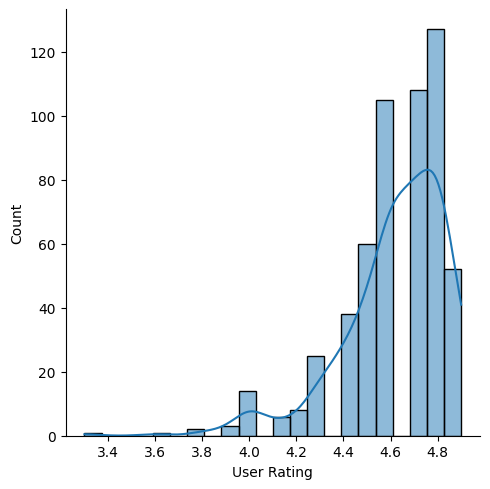

Skewness : -1.502125498034903
Distribution of: ['User Rating', 'Reviews', 'Price', 'Year']


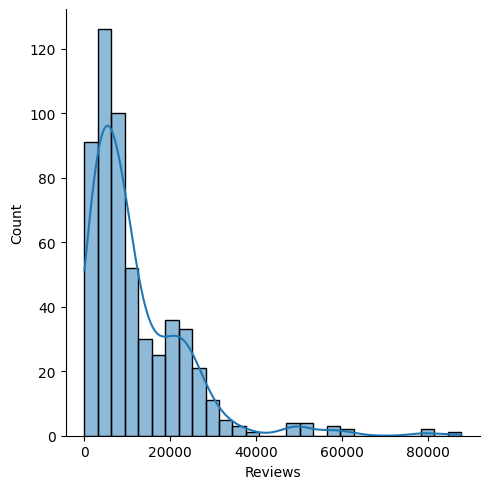

Skewness : 2.4215968315268785
Distribution of: ['User Rating', 'Reviews', 'Price', 'Year']


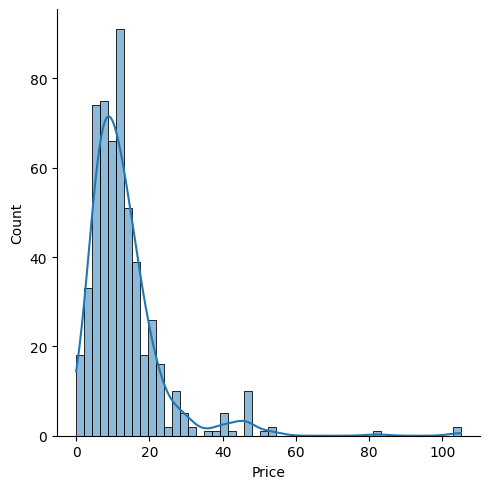

Skewness : 3.685056537836339
Distribution of: ['User Rating', 'Reviews', 'Price', 'Year']


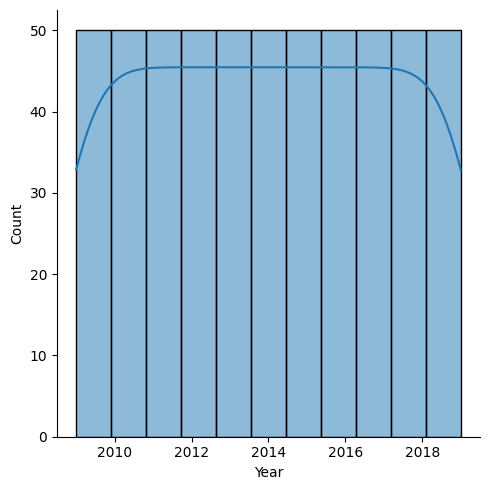

Skewness : 0.0


In [29]:
# Checking the skewness of numerical features and printing their values
labels = ['User Rating', 'Reviews', 'Price', 'Year']
for label in labels:
    print("Distribution of:", labels)
    sns.displot(df[label], kde=True)
    plt.show()
    print('Skewness :', df[label].skew())

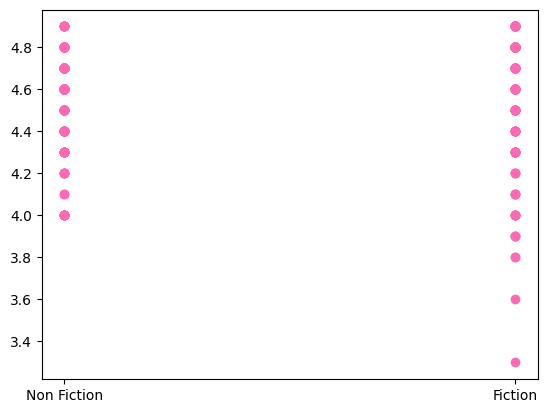

In [35]:
# Checking the association between User Rating and Genre
plt.scatter(x='Genre', y='User Rating', data=df, color='#FF69B4')
plt.show()

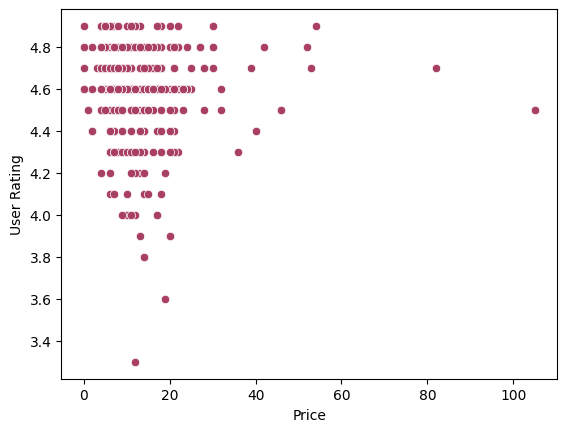

In [37]:
# Checking the association between User Rating and Price
sns.scatterplot(x='Price', y='User Rating', data=df, color='#A94064')
plt.show()